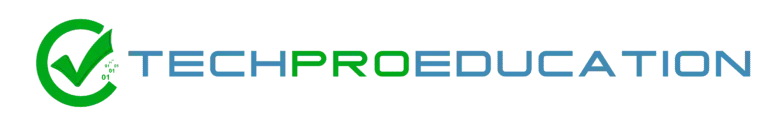

# NLP Application with ML

## Classification of Tweets Data

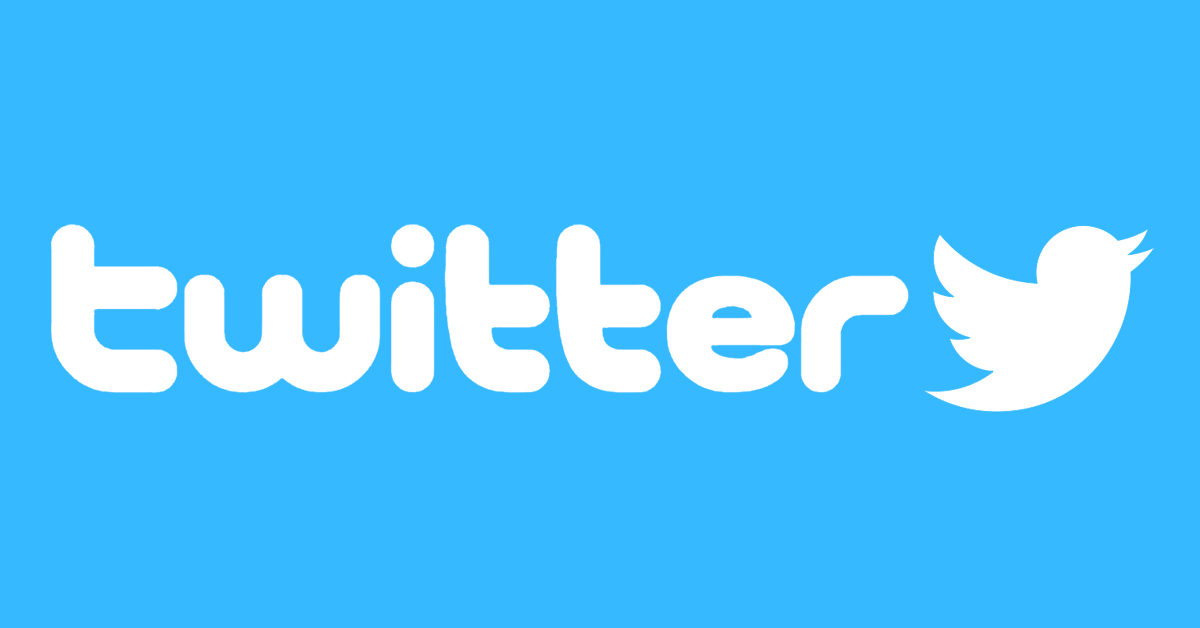

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

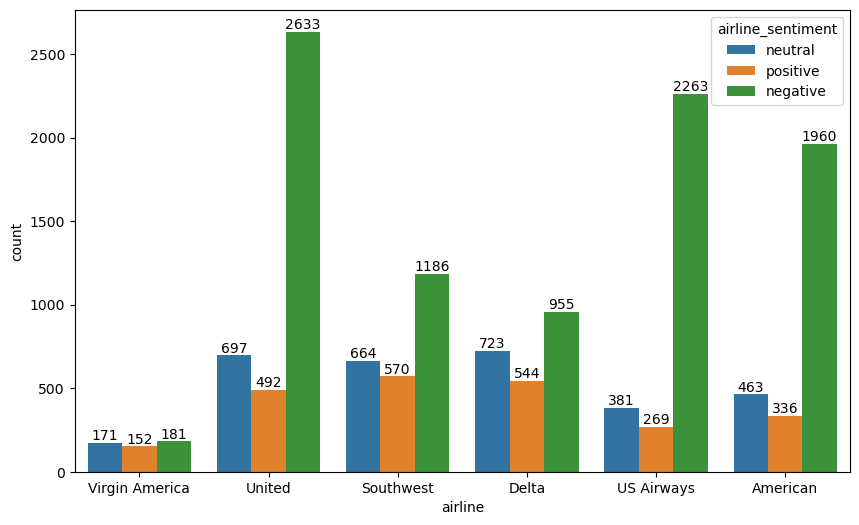

In [4]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

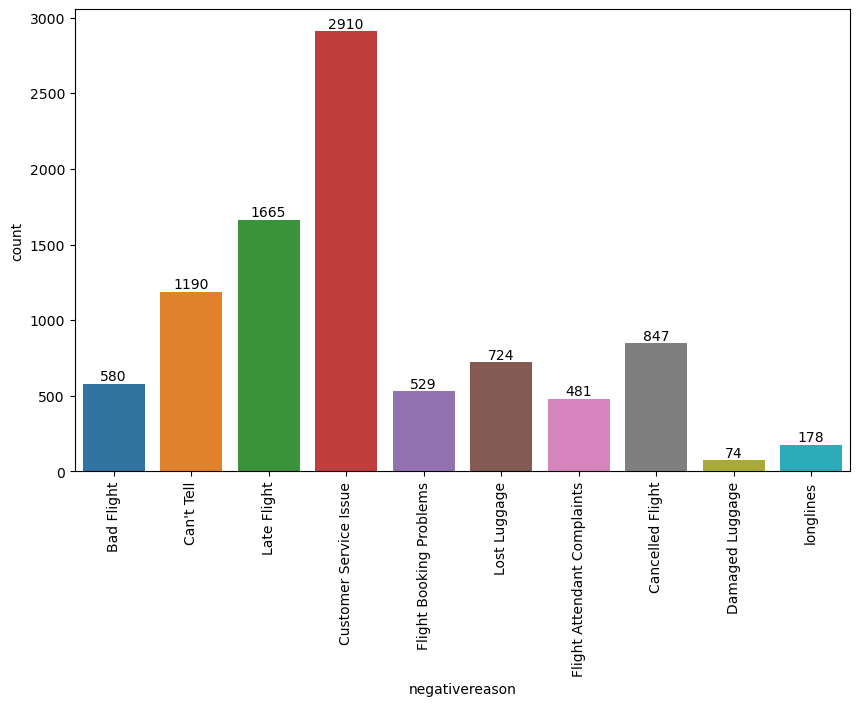

In [5]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

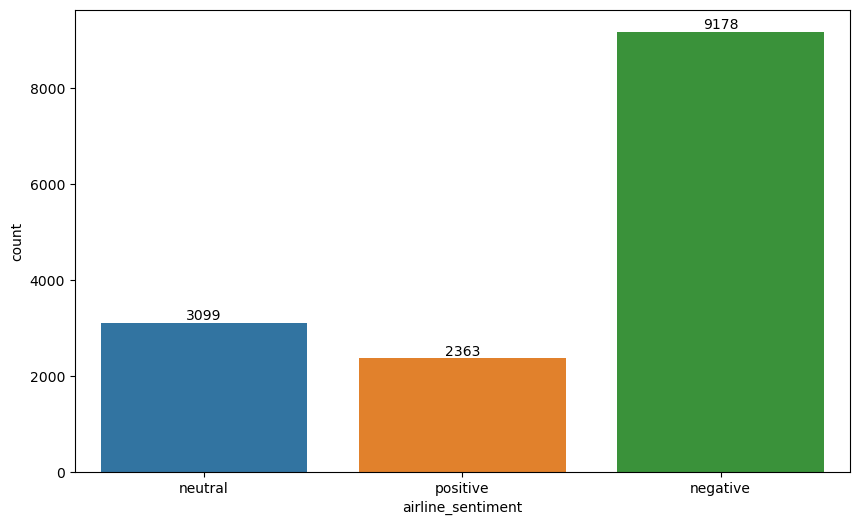

In [6]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

In [7]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

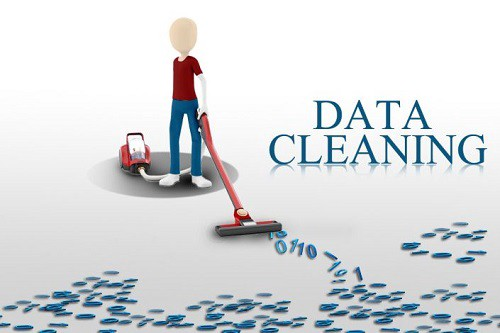

## Cleaning Data

In [8]:
df2 = df.copy()

In [9]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Cleaning Data

The "re" module in Python is used to perform "regular expression" operations. The "re" module is used for various tasks such as searching for specific patterns in text, replacing matching patterns, and manipulating text based on patterns.

Regular expressions are sequences of characters that define patterns to find or replace certain parts of text. For example, you can use the "re" module to find all email addresses in a text or to replace a specific pattern within a text.

The "re" module includes many functions like **re.sub()**, which allows you to find and replace matching patterns. Functions like **re.search()**, **re.match()**, and **re.findall()** are used to search for patterns or retrieve the matched patterns.

Regular expressions use special characters and tokens to define patterns in text. For example, **"\d"** represents digit characters, while **"\w"** represents word characters. These special characters and tokens allow you to define more complex patterns.

The "re" module can be used in areas such as text processing, text analysis, data cleaning, and validation. Understanding and using regular expressions is a powerful tool for text processing and analysis.

In [10]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()          # Remove everything after "http" except spaces, and replace with ("")
s                                              # strip removes the leading and trailing spaces


'#lateflight @airlines'

Clean URLs in the text using regular expressions with re.sub

s = re.sub("http\S+", "", s).strip()  # Replace characters starting with "http" and followed by non-space characters with ("")
s = s.strip()  # Remove leading and trailing spaces in the text


In [11]:
s = re.sub("#\S+", "", s)                   # clean the expression starting with "#" 
s

' @airlines'

In [12]:
s = re.sub("@\S+", "", s)                   # clean the expression starting with "@" 
s.strip()

''

In [13]:
#nltk.download('stopwords')          # already loaded in the previous nb

In [14]:
#nltk.download('wordnet')

In [15]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:            # In sentiment analysis, "not" and "no" should remain in the data. We remove these two expressions from the stop words.
    stop_words.remove(i)


In [16]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")    # remove ' from expressions like don't.
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [17]:
cleaning_text = df2["text"].apply(cleaning)       # applying the cleaning function on the entire data
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [18]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df2["text"]
y= df2["airline_sentiment"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

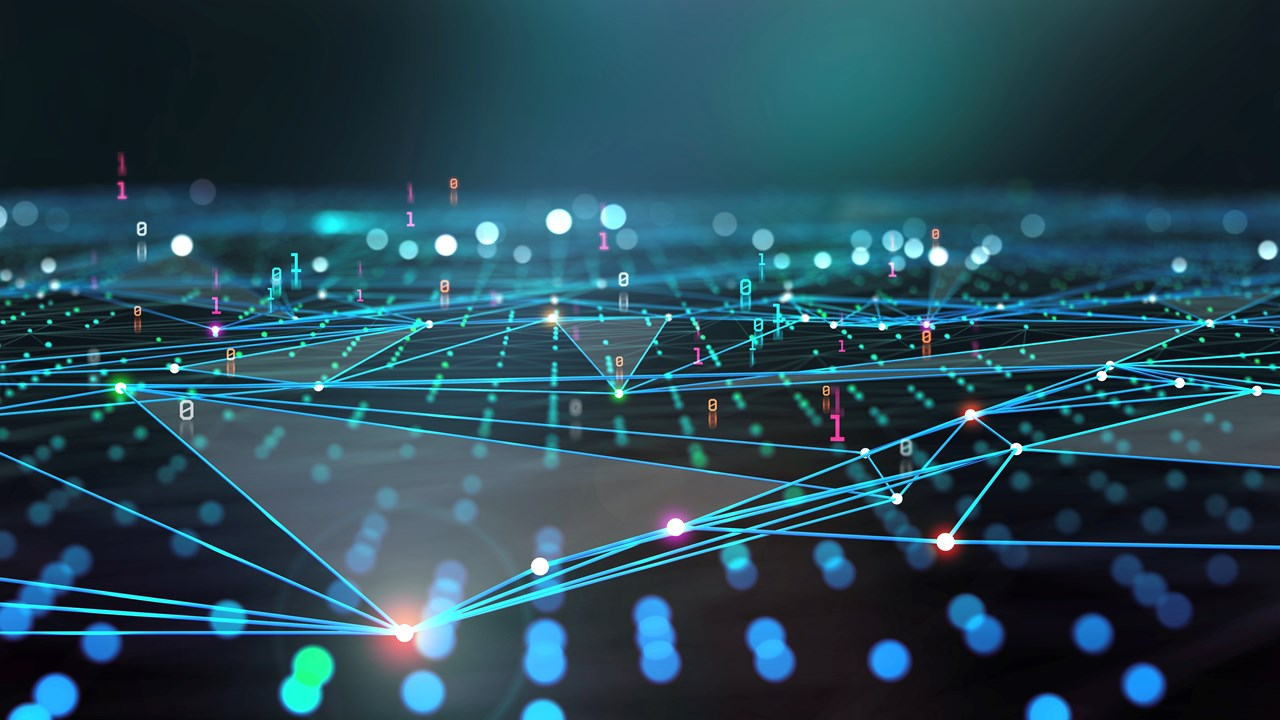

## Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)  # min_df=3 (Ignore terms that appear 3 times or less in my corpus)
X_train_count = vectorizer.fit_transform(X_train)         
X_test_count = vectorizer.transform(X_test) 


In [24]:
# The data is cleaned by calling the cleaning function thanks to "preprocessor=cleaning"


In [25]:
X_train_count

<11712x3127 sparse matrix of type '<class 'numpy.int64'>'
	with 91725 stored elements in Compressed Sparse Row format>

In [26]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  aadvantage  abc  ability  able  aboard  abq  absolute  absolutely  \
0       0           0    0        0     0       0    0         0           0   
1       0           0    0        0     0       0    0         0           0   
2       0           0    0        0     0       0    0         0           0   
3       0           0    0        0     0       0    0         0           0   
4       0           0    0        0     0       0    0         0           0   
...    ..         ...  ...      ...   ...     ...  ...       ...         ...   
11707   0           0    0        0     0       0    0         0           0   
11708   0           0    0        0     0       0    0         0           0   
11709   0           0    0        0     0       0    0         0           0   
11710   0           0    0        0     0       0    0         0           0   
11711   1           0    0        0     0       0    0         0           0   

       absurd  abt  abysmal  ac  accept  acceptable  accepted  accepting  \
0           0    0        0   0       0           0         0          0   
1           0    0        0   0       0           0         0          0   
2           0    0        0   0       0           0         0          0   
3           0    0        0   0       0           0         0          0   
4           0    0        0   0       0           0         0          0   
...       ...  ...      ...  ..     ...         ...       ...        ...   
11707       0    0        0   0       0           0         0          0   
11708       0    0        0   0       0           0         0          0   
11709       0    0        0   0       0           0         0          0   
11710       0    0        0   0       0           0         0          0   
11711       0    0        0   0       0           0         0          0   

       access  accident  accommodate  accommodating  accommodation  \
0           0         0            0              0              0   
1           0         0            0              0              0   
2           0         0            0              0              0   
3           0         0            0              0              0   
4           0         0            0              0              0   
...       ...       ...          ...            ...            ...   
11707       0         0            0              0              0   
11708       0         0            0              0              0   
11709       0         0            0              0              0   
11710       0         0            0              0              0   
11711       0         0            0              0              0   

       accomplished  according  accordingly  account  accountability  acct  \
0                 0          0            0        0               0     0   
1                 0          0            0        1               0     0   
2                 0          0            0        0               0     0   
3                 0          0            0        0               0     0   
4                 0          0            0        0               0     0   
...             ...        ...          ...      ...             ...   ...   
11707             0          0            0        0               0     0   
11708             0          0            0        0               0     0   
11709             0          0            0        0               0     0   
11710             0          0            0        0               0     0   
11711             0          0            0        0               0     0   

       accurate  acknowledge  across  act  action  active  actual  actually  \
0             0            0       0    0       0       0       0         0   
1             0            0       0    0       0       0       0         0   
2             0            0       0    0       0       0       0         0   
3             0            0       0   

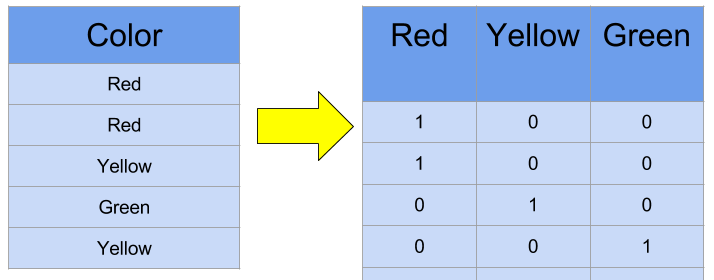

## Model Comparisons - Vectorization

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [29]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [30]:
y_train

12713    negative
9305     positive
9726     negative
4751     negative
14102    negative
           ...   
6570     negative
880       neutral
10563    negative
3924      neutral
11333    negative
Name: airline_sentiment, Length: 11712, dtype: object

In [31]:
y_train.unique()

array(['negative', 'positive', 'neutral'], dtype=object)

## Logistic Regression

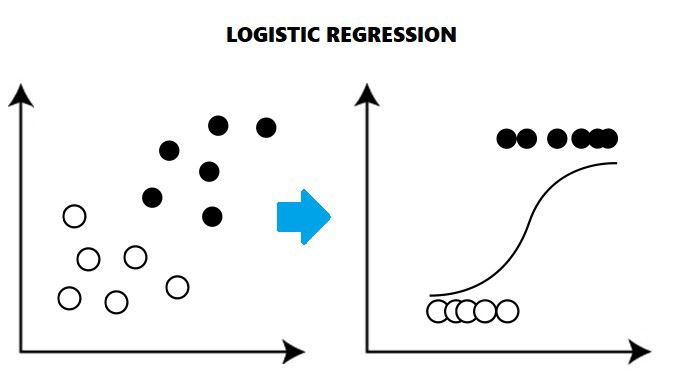

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [33]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1759   40   36]
 [ 367  209   44]
 [ 175   48  250]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.70      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.74      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.41      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

In [38]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.745817
test_precision-neg    0.747702
test_recall-neg       0.963501
test_f1-neg           0.841975
dtype: float64

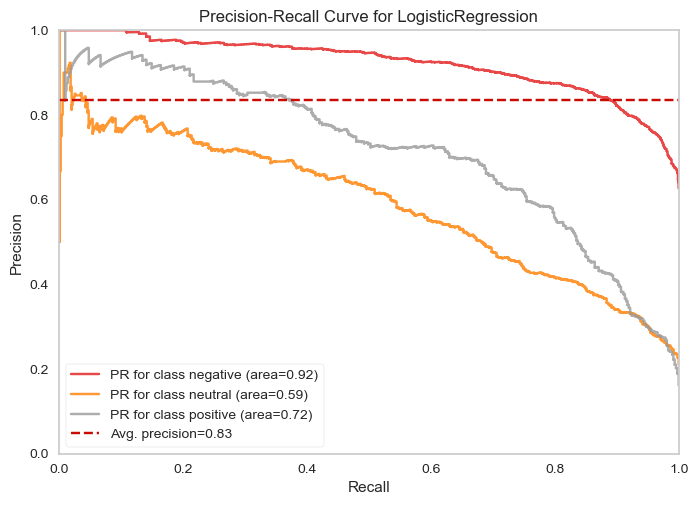

In [40]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [41]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [42]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [43]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1303  435   97]
 [  99  446   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.67      0.73      0.69       473

    accuracy                           0.71      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



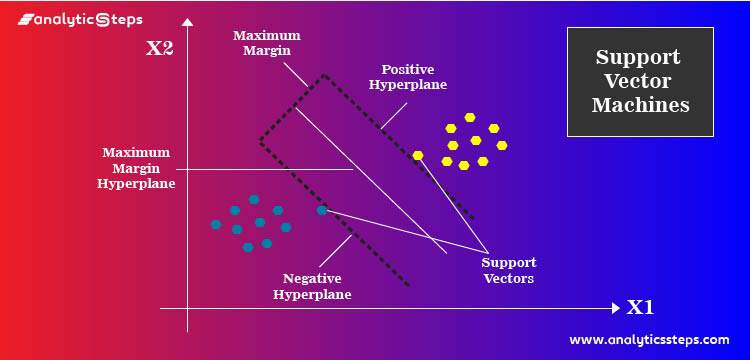

## SVM

In [44]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [45]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1710   81   44]
 [ 290  279   51]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [46]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.777579
test_precision-neg    0.799725
test_recall-neg       0.939532
test_f1-neg           0.863993
dtype: float64

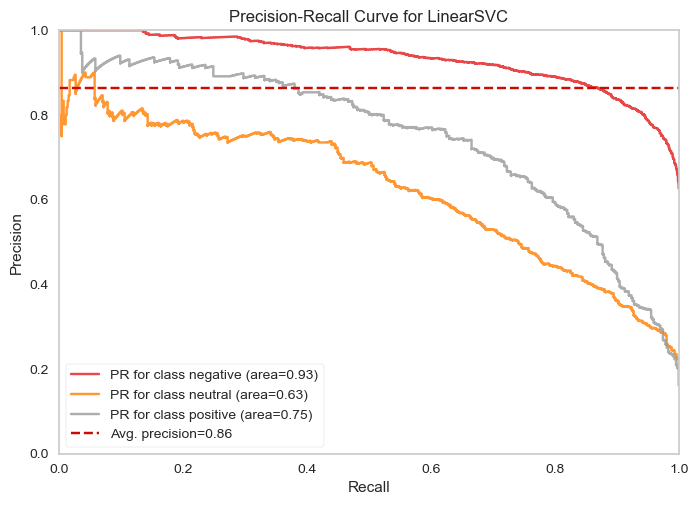

In [47]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [48]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

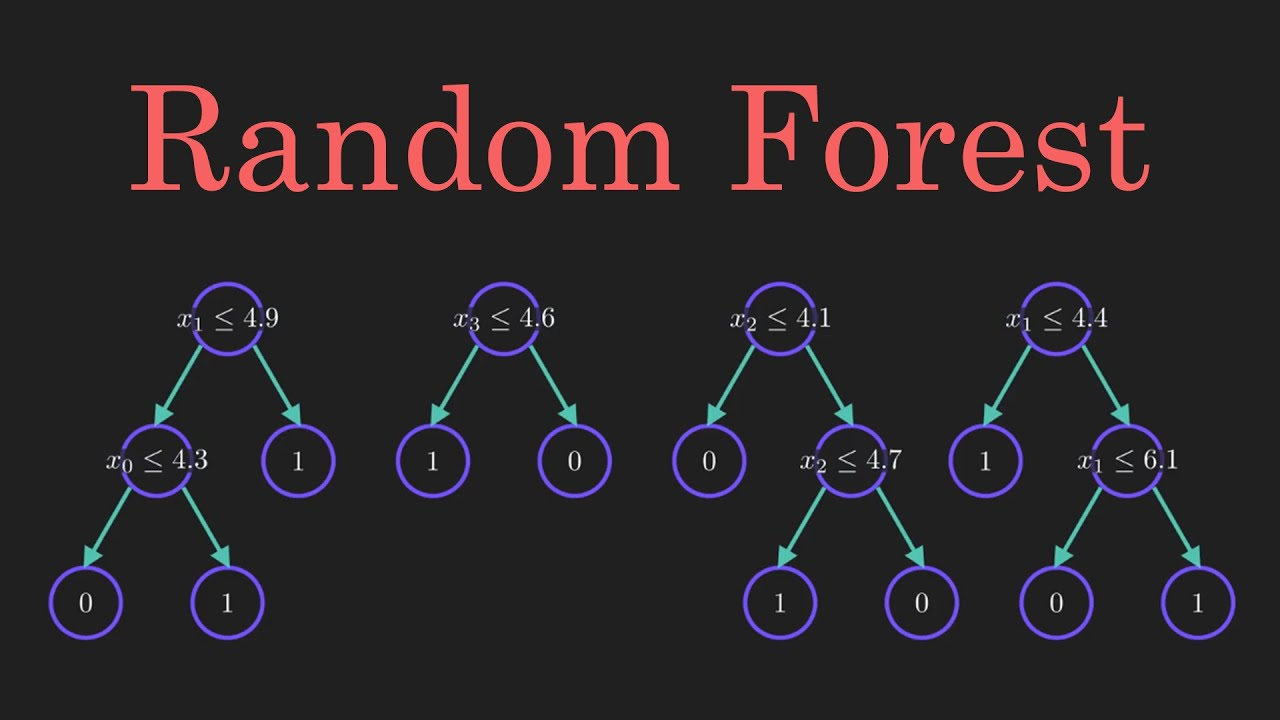

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [50]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1799   12   24]
 [ 514   68   38]
 [ 223    8  242]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.77      0.11      0.19       620
    positive       0.80      0.51      0.62       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.55      2928
weighted avg       0.74      0.72      0.66      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.22      0.35      2479
    positive       0.93      0.64      0.76      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.62      0.65     11712
weighted avg       0.82      0.77      0.73     11712



In [51]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.709102
test_precision-neg    0.698146
test_recall-neg       0.983929
test_f1-neg           0.816752
dtype: float64

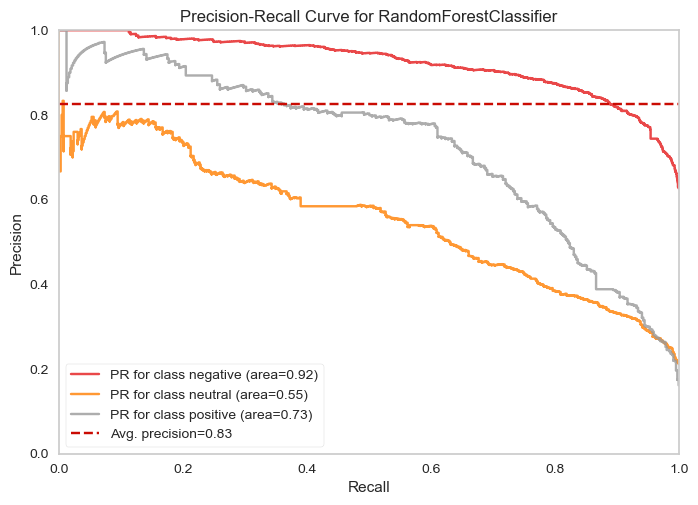

In [52]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [53]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

In [54]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [55]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1470  291   74]
 [ 165  396   59]
 [  61   96  316]]
Test_Set
              precision    recall  f1-score   support

    negative       0.87      0.80      0.83      1835
     neutral       0.51      0.64      0.56       620
    positive       0.70      0.67      0.69       473

    accuracy                           0.75      2928
   macro avg       0.69      0.70      0.69      2928
weighted avg       0.76      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.98      0.86      0.91      7343
     neutral       0.65      0.91      0.76      2479
    positive       0.88      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.84     11712
weighted avg       0.89      0.86      0.87     11712



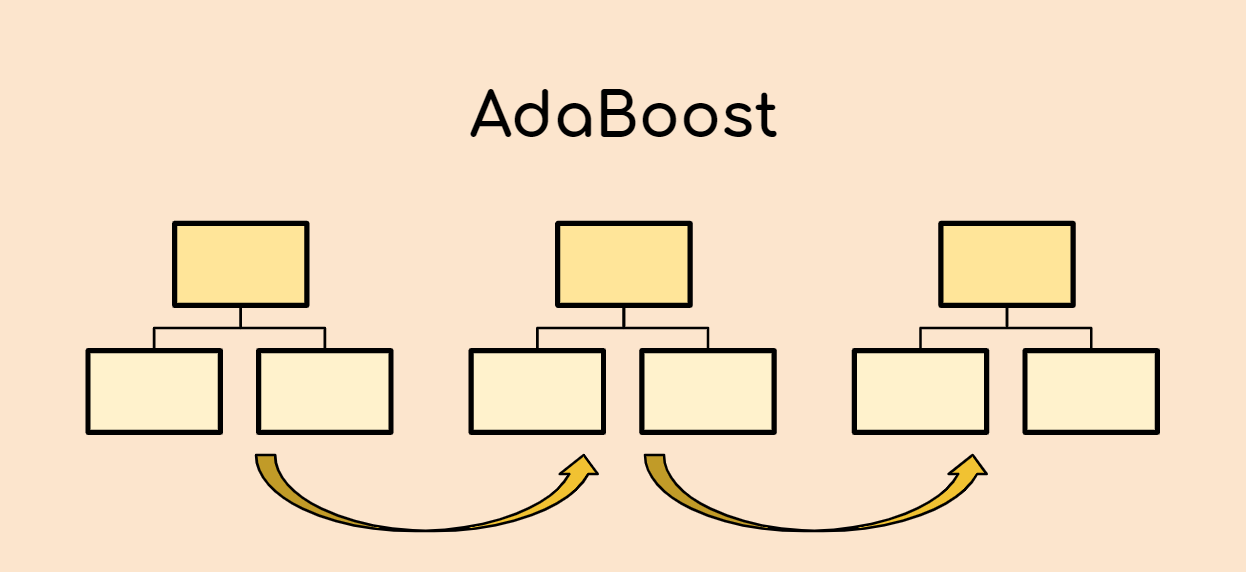

## Ada Boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [57]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1560  204   71]
 [ 203  344   73]
 [  82   76  315]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1835
     neutral       0.55      0.55      0.55       620
    positive       0.69      0.67      0.68       473

    accuracy                           0.76      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.76      0.76      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      7343
     neutral       0.61      0.62      0.62      2479
    positive       0.78      0.71      0.74      1890

    accuracy                           0.80     11712
   macro avg       0.75      0.74      0.74     11712
weighted avg       0.80      0.80      0.80     11712



In [58]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.761441
test_precision-neg    0.845893
test_recall-neg       0.858366
test_f1-neg           0.852045
dtype: float64

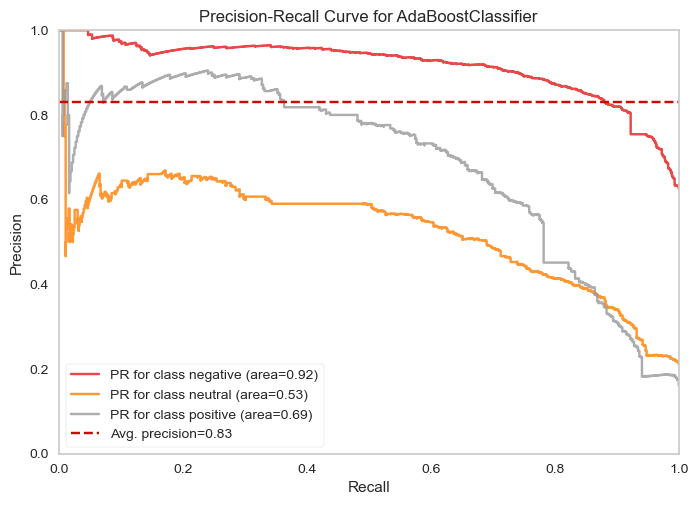

In [59]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [60]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = viz.score_["negative"]

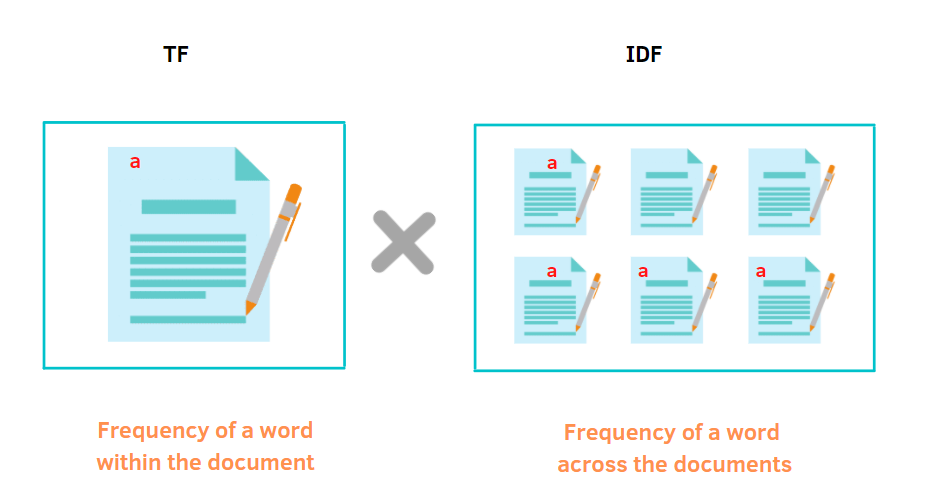

## TF-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [63]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa  aadvantage  abc  ability  able  aboard  abq  absolute  \
0      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
1      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
2      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
3      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
4      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
...         ...         ...  ...      ...   ...     ...  ...       ...   
11707  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11708  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11709  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11710  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11711  0.325452         0.0  0.0      0.0   0.0     0.0  0.0       0.0   

       absolutely  absurd  abt  abysmal   ac  accept  acceptable  accepted  \
0             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
1             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
2             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
3             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
4             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
...           ...     ...  ...      ...  ...     ...         ...       ...   
11707         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11708         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11709         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11710         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11711         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   

       accepting  access  accident  accommodate  accommodating  accommodation  \
0            0.0     0.0       0.0          0.0            0.0            0.0   
1            0.0     0.0       0.0          0.0            0.0            0.0   
2            0.0     0.0       0.0          0.0            0.0            0.0   
3            0.0     0.0       0.0          0.0            0.0            0.0   
4            0.0     0.0       0.0          0.0            0.0            0.0   
...          ...     ...       ...          ...            ...            ...   
11707        0.0     0.0       0.0          0.0            0.0            0.0   
11708        0.0     0.0       0.0          0.0            0.0            0.0   
11709        0.0     0.0       0.0          0.0            0.0            0.0   
11710        0.0     0.0       0.0          0.0            0.0            0.0   
11711        0.0     0.0       0.0          0.0            0.0            0.0   

       accomplished  according  accordingly   account  accountability  acct  \
0               0.0        0.0          0.0  0.000000             0.0   0.0   
1               0.0        0.0          0.0  0.466987             0.0   0.0   
2               0.0        0.0          0.0  0.000000             0.0   0.0   
3               0.0        0.0          0.0  0.000000             0.0   0.0   
4               0.0        0.0          0.0  0.000000             0.0   0.0   
...             ...        ...          ...       ...             ...   ...   
11707           0.0        0.0          0.0  0.000000             0.0   0.0   
11708           0.0        0.0          0.0  0.000000             0.0   0.0   
11709           0.0        0.0          0.0  0.000000             0.0   0.0   
11710           0.0        0.0          0.0  0.000000             0.0   0.0   
11711           0.0        0.0          0.0  0.000000             0.0   0.0   

       accurate  acknowledge  across  act  action  active  actual  actually  \
0           0.0          0.0     0.0  0.0     0.0     0.0     0.0       0.0   
1           0.0          0.0     0.0  0.0     0.0     0.0     0.0       0.0   
2           0.0          0.0

## Model Comparisons  TF-IDF

## Logistic Regression

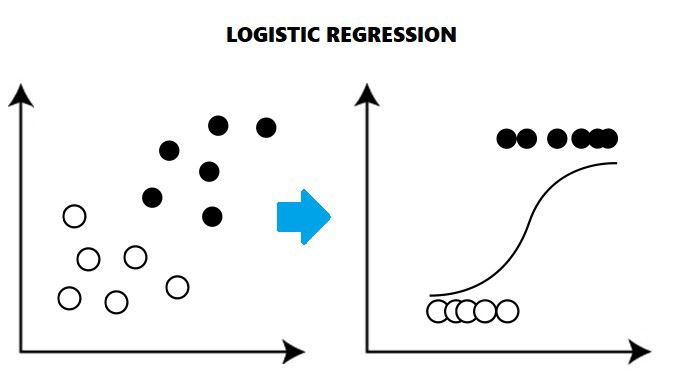

In [65]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [66]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 332  256   32]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.41      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.69      2928
weighted avg       0.78      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.82      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [67]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.771432
test_precision-neg    0.776135
test_recall-neg       0.960506
test_f1-neg           0.858515
dtype: float64

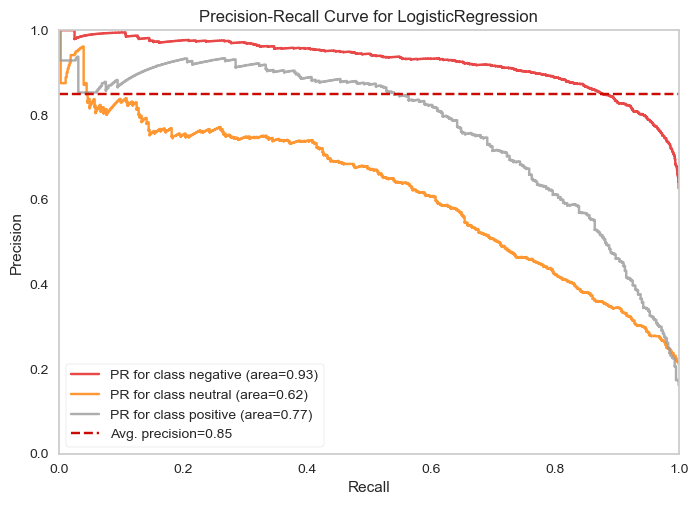

In [68]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [69]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = viz.score_["negative"]

In [70]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [71]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1433  303   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



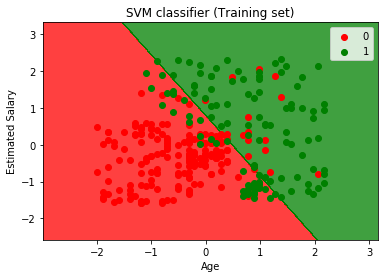

## SVM

In [72]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [73]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1737   64   34]
 [ 312  263   45]
 [ 125   43  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.64      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [74]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.782019
test_precision-neg    0.790354
test_recall-neg       0.956965
test_f1-neg           0.865677
dtype: float64

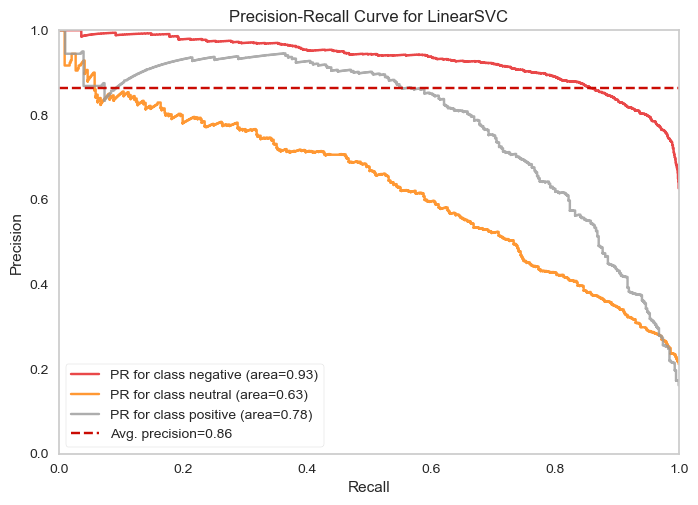

In [75]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [76]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = viz.score_["negative"]

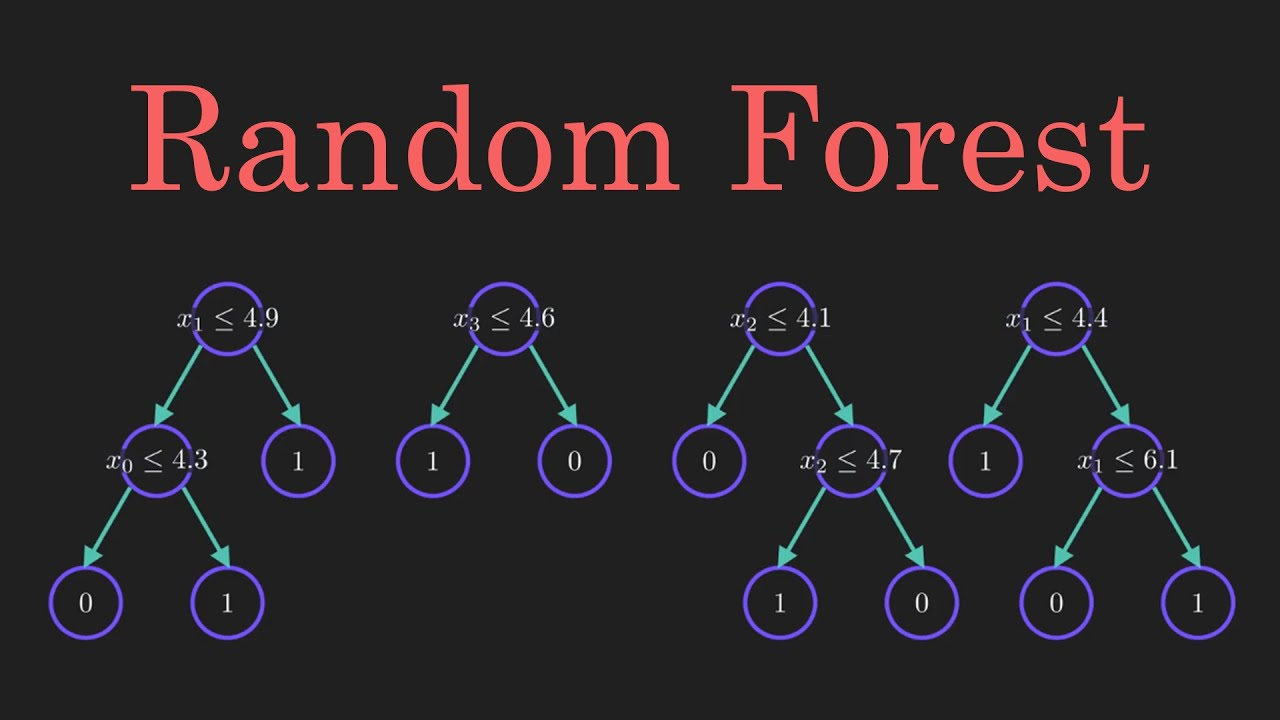

## RandomForest

In [77]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [78]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1803    6   26]
 [ 530   53   37]
 [ 240    6  227]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.82      0.09      0.15       620
    positive       0.78      0.48      0.60       473

    accuracy                           0.71      2928
   macro avg       0.77      0.52      0.52      2928
weighted avg       0.74      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.20      0.33      2479
    positive       0.93      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.59      0.63     11712
weighted avg       0.82      0.76      0.72     11712



In [79]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.706881
test_precision-neg    0.694620
test_recall-neg       0.986518
test_f1-neg           0.815223
dtype: float64

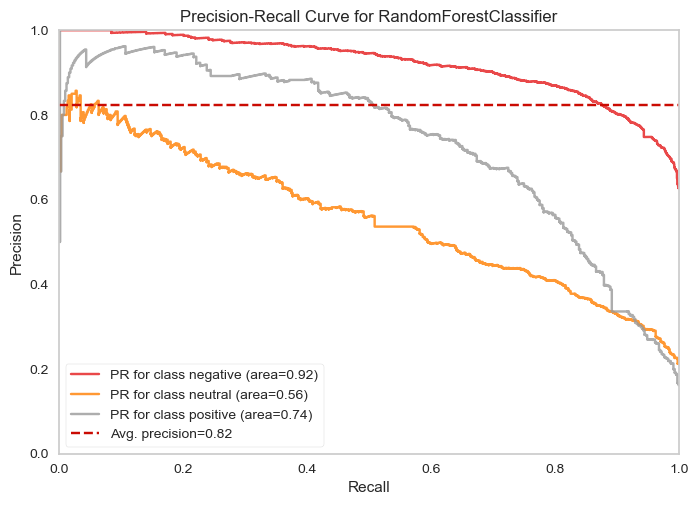

In [80]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [82]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [83]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1373  396   66]
 [ 131  426   63]
 [  48  118  307]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.75      0.81      1835
     neutral       0.45      0.69      0.55       620
    positive       0.70      0.65      0.68       473

    accuracy                           0.72      2928
   macro avg       0.68      0.69      0.68      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.77      0.84      7343
     neutral       0.50      0.80      0.62      2479
    positive       0.76      0.69      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.73      0.75      0.73     11712
weighted avg       0.81      0.76      0.77     11712



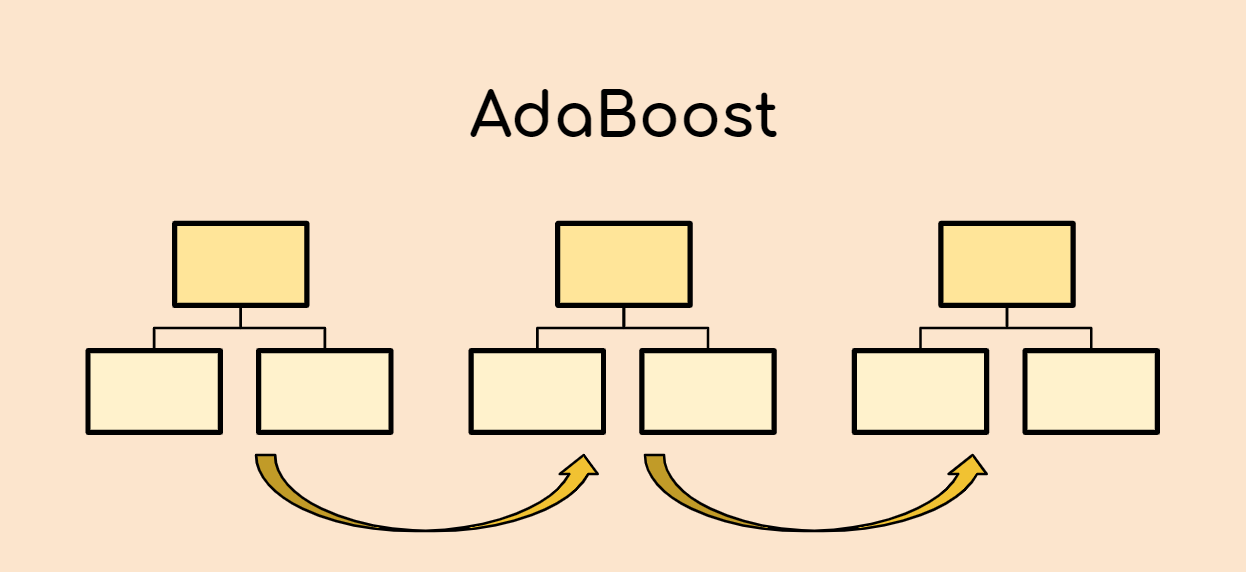

## Ada Boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [85]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1545  213   77]
 [ 225  345   50]
 [ 101   75  297]]
Test_Set
              precision    recall  f1-score   support

    negative       0.83      0.84      0.83      1835
     neutral       0.55      0.56      0.55       620
    positive       0.70      0.63      0.66       473

    accuracy                           0.75      2928
   macro avg       0.69      0.68      0.68      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      7343
     neutral       0.62      0.61      0.62      2479
    positive       0.82      0.73      0.77      1890

    accuracy                           0.80     11712
   macro avg       0.76      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [86]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.742573
test_precision-neg    0.826416
test_recall-neg       0.843663
test_f1-neg           0.834851
dtype: float64

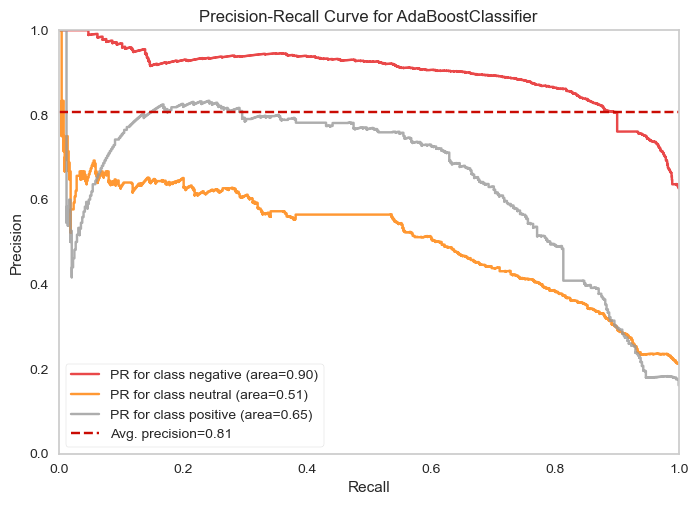

In [87]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [88]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = viz.score_["negative"]

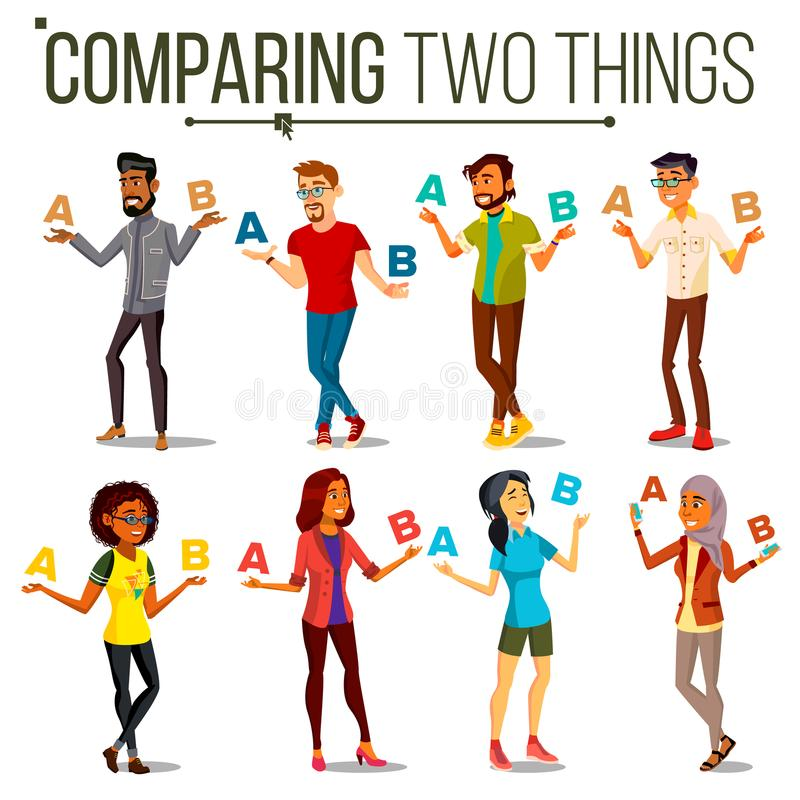

## Compare Scoring

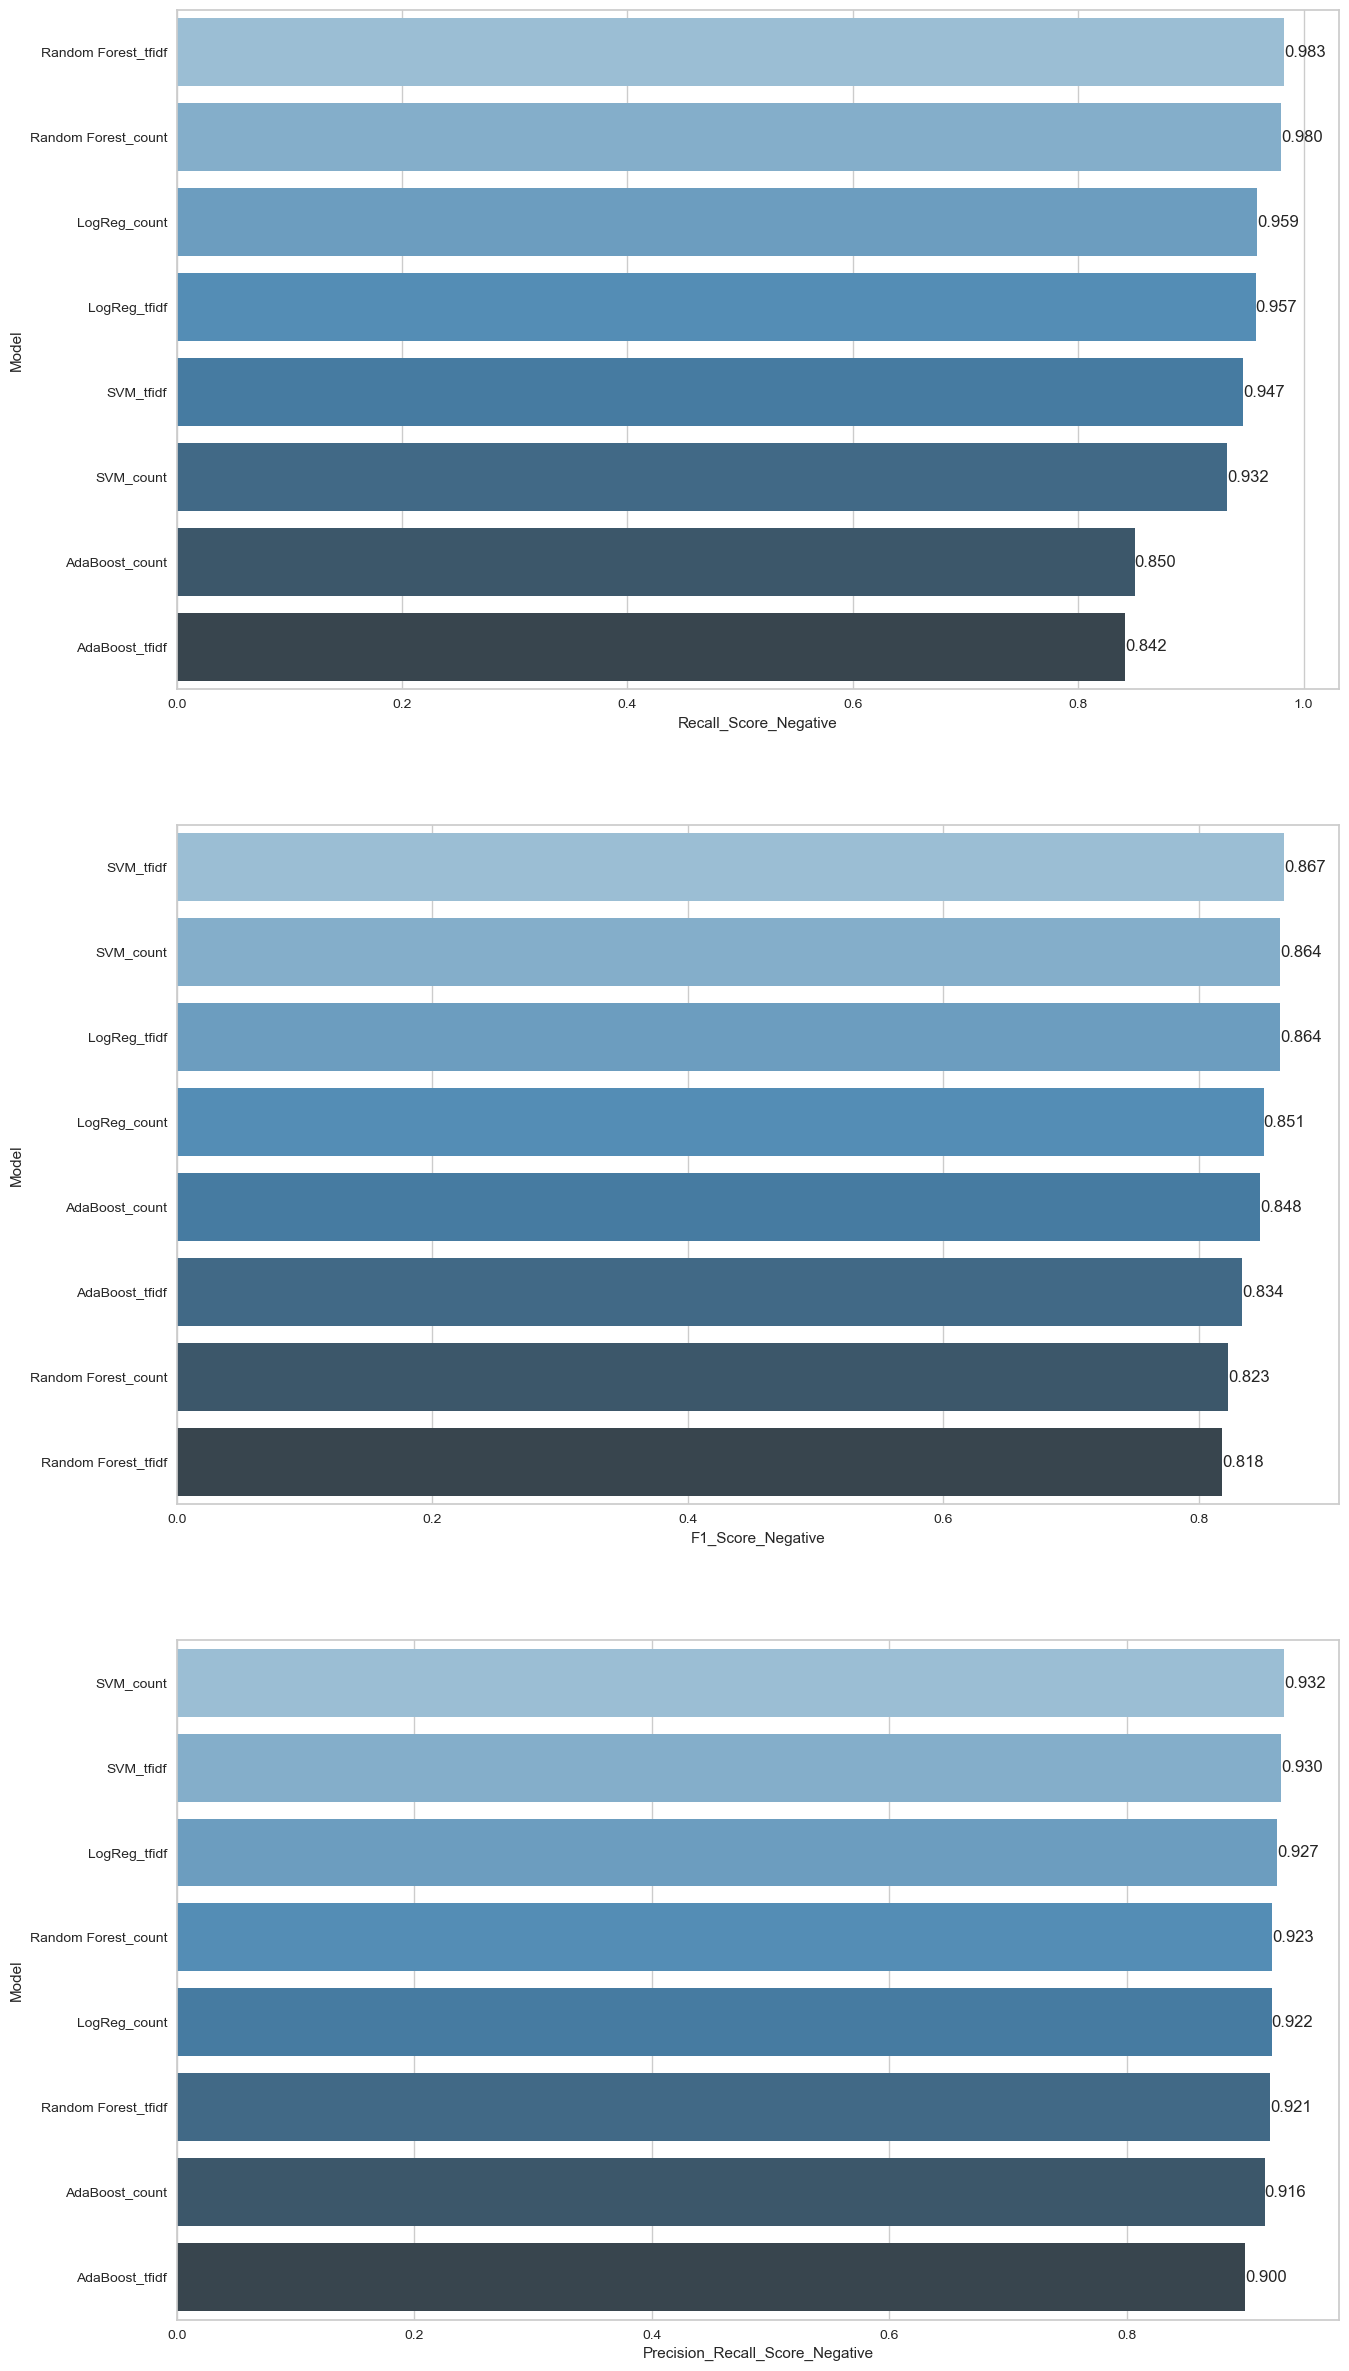

In [90]:
compare = pd.DataFrame({"Model": ["LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "LogReg_tfidf", "SVM_tfidf",  
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [log_count_f1_neg[0], svc_count_f1_neg[0], 
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                   rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [log_AP_neg, svc_AP_neg,  rf_AP_neg,
                                                          ada_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                            rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

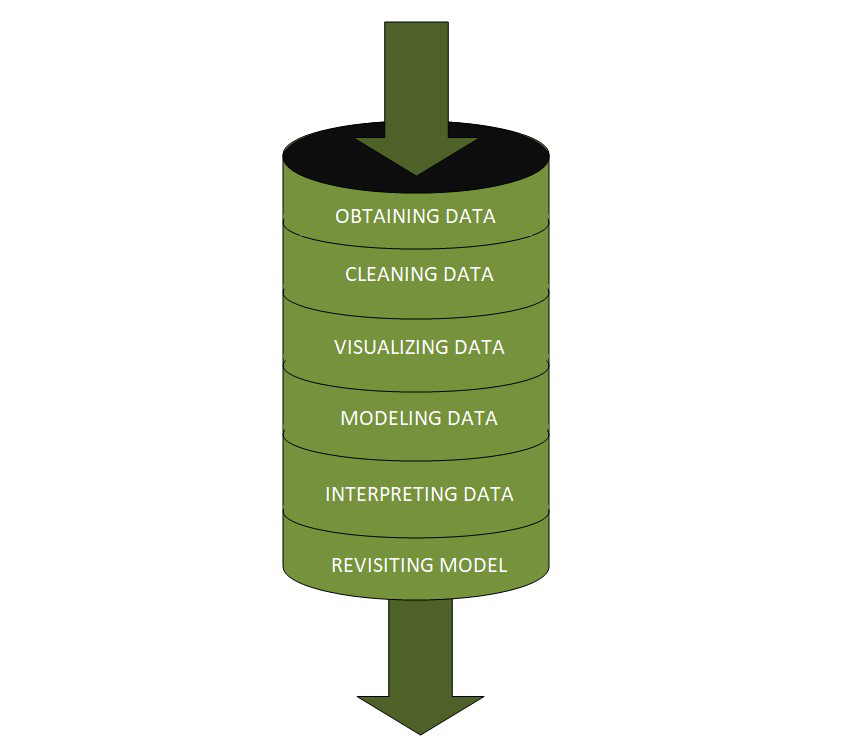

## For New Tweets, prediction with pipeline


In [91]:
from sklearn.pipeline import Pipeline

This code creates a data processing and classification pipeline using the **scikit-learn** library. Pipelines are commonly used in applications such as text mining or text classification. The pipeline combines data processing and modeling steps, making it easily reusable.

This specific pipeline has two main steps:

- **TfidfVectorizer**: A vectorizer that converts text documents into TF-IDF (Term Frequency-Inverse Document Frequency) vectors. It applies preprocessing to the text data using **preprocessor=cleaning** and uses **min_df=3** to include only terms that appear in at least 3 documents.

- **LogisticRegression**: It uses logistic regression as the classification model. The penalty term (regularization parameter) is set with **C=0.4**, and the maximum number of iterations is limited to **max_iter=1000**.

In [92]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log',LogisticRegression(C=0.4, max_iter=1000))])

This code creates a data processing and modeling pipeline using the **Pipeline** class. A pipeline is a series of steps where each step sequentially transforms or applies a model to the data.

This specific pipeline consists of two steps:

- **TfidfVectorizer**: This is the vectorization (feature extraction) step used to convert text data into numerical vectors. The **TfidfVectorizer** class transforms the text into TF-IDF (Term Frequency-Inverse Document Frequency) values. The **preprocessor=cleaning** parameter specifies a preprocessing function called **cleaning** for text data preprocessing. The **min_df=3** parameter ensures that only terms appearing in at least 3 documents are used.

- **LogisticRegression**: This represents the classification model. Here, the **LogisticRegression** class is used to create a logistic regression model. The **C=0.4** parameter specifies the **C** parameter for the logistic regression model. The **max_iter=1000** parameter sets the maximum number of iterations.

This pipeline converts text data into TF-IDF values and then trains a logistic regression model using those values.

**max_iter=1000** is a parameter that specifies the maximum number of iterations for the logistic regression model. Iterations refer to the repeated update steps the model takes to fit the training data. The logistic regression model stops the training process either when the maximum number of iterations is reached or when the convergence criterion is met.

This parameter is used to control how long the model will train. In particular, large datasets or complex models may require more iterations for training. The **max_iter** value can be adjusted to either extend or shorten the training duration. A value of 1000 indicates that the training will be terminated after a specific number of iterations.

In [93]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x000001966CC7B920>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

This code uses the **pipe** pipeline to fit the data. The **fit** process sequentially runs each step in the pipeline, transforming the data and applying it to the model.

The **X** dataset represents the training data. This data should contain the feature vectors of the texts. As mentioned in the previous step, the **TfidfVectorizer** step converts the texts into TF-IDF values.

The **y** dataset contains the corresponding labels. In a classification problem, this should include the correct class labels corresponding to the text examples.

This code is used to fit the pipeline to the training data. This process converts the texts into numerical vectors using the **TfidfVectorizer** step, and then trains the logistic regression model in the **LogisticRegression** step. The model builds a classification model by using the features of the texts and the corresponding labels.

In [94]:
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [95]:
tweet = "didn't enjoy flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [96]:
tweet = "it is amazing"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [97]:
tweet = "it isn't amazing"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [98]:
tweet = "don't enjoy flight  at all"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [99]:
tweet = "I don't think I'll ever use American Airlines any more"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [100]:
tweet = "I don't love the flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

## Collect Words and Counting words

In [101]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [102]:
all_words = " ".join(tweets)

In [103]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

In [104]:
counter = Counter(word_tokenize(all_words))

In [105]:
counter.most_common()

[('flight', 4524),
 ('not', 1624),
 ('no', 1486),
 ('get', 1374),
 ('hour', 1138),
 ('thanks', 1073),
 ('cancelled', 1048),
 ('u', 994),
 ('service', 987),
 ('time', 946),
 ('customer', 930),
 ('help', 849),
 ('bag', 765),
 ('im', 743),
 ('plane', 724),
 ('amp', 678),
 ('hold', 642),
 ('need', 633),
 ('thank', 602),
 ('one', 580),
 ('still', 578),
 ('cant', 575),
 ('please', 562),
 ('call', 561),
 ('would', 549),
 ('day', 549),
 ('airline', 546),
 ('gate', 541),
 ('delayed', 530),
 ('back', 525),
 ('flightled', 506),
 ('dont', 490),
 ('seat', 480),
 ('got', 480),
 ('phone', 453),
 ('delay', 434),
 ('like', 432),
 ('today', 427),
 ('late', 424),
 ('guy', 423),
 ('agent', 416),
 ('know', 381),
 ('fly', 380),
 ('ticket', 380),
 ('make', 375),
 ('airport', 366),
 ('waiting', 366),
 ('change', 359),
 ('way', 358),
 ('trying', 348),
 ('minute', 345),
 ('go', 336),
 ('great', 335),
 ('ive', 328),
 ('wait', 326),
 ('going', 324),
 ('never', 319),
 ('min', 309),
 ('tomorrow', 309),
 ('problem',

In [106]:
for i in counter.most_common():
    if "enjoy" == i[0]:
        print(i)

('enjoy', 21)


In [107]:
for i in counter.most_common():
    if "love" == i[0]:
        print(i)

('love', 240)


In [108]:
for i in counter.most_common():
    if "like" == i[0]:
        print(i)

('like', 432)


This code snippet checks the most frequent items in a **counter** object using a loop and searches for the word "like." If the word "like" is found, it prints the frequency and count of this word.

The **counter.most_common()** method returns the items in the **counter** object in descending order of frequency. Each item is returned as a tuple, where the first element represents the word and the second element represents the frequency of the word.

If the word "like" exists in the **counter** object, this code snippet prints the frequency and count of the corresponding item.

In [109]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)      

5


In [110]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)

30


In [111]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "didnt" in j and y[i]=="negative":
        counter += 1
print(counter)

4


This code snippet loops through a list called **tweets**. For each tweet, it checks if the words "like" and "didnt" are present and if the tweet's class (specified as "negative") is labeled as negative. If these conditions are met, it increments the **counter** variable.

As a result, this code snippet counts the number of tweets that contain the words "like" and "didnt" and are classified as "negative," and it prints this count via the **counter** variable.

In [112]:
counter = 0
for i,j in enumerate(tweets):
    if "amazing" in j and "wasnt" in j and y[i]=="negative":
        counter += 1
print(counter)

0


In [113]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and y[i]=="neutral":
        counter += 1
print(counter)

48


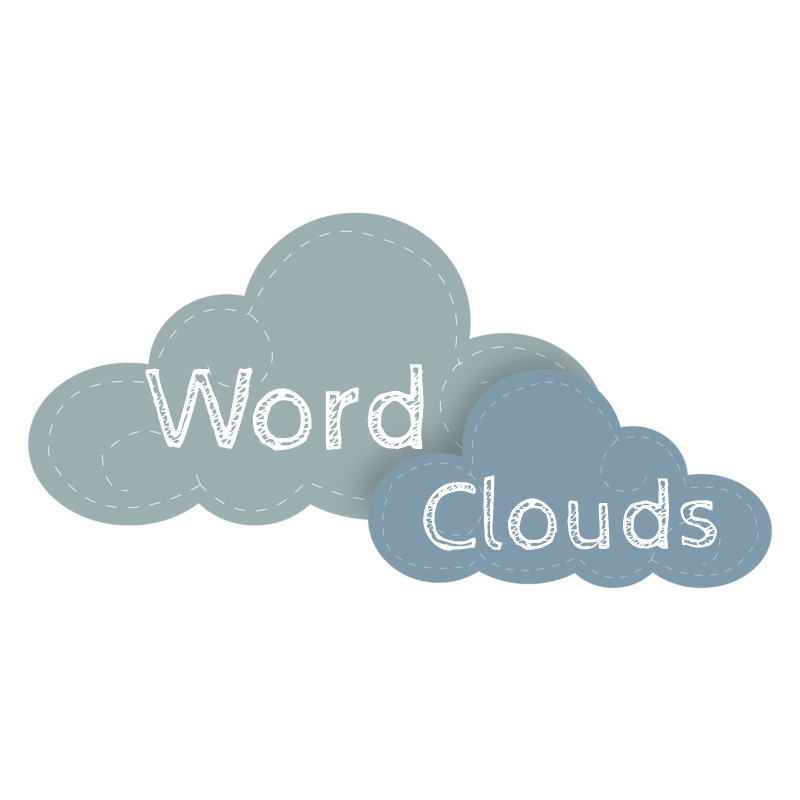

## WordCloud - Repetition of Words

## Collect Words

In [114]:
all_words = " ".join(tweets)

In [115]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [116]:
# !pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
from wordcloud import WordCloud

In [118]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [119]:
worldcloud.generate(all_words)

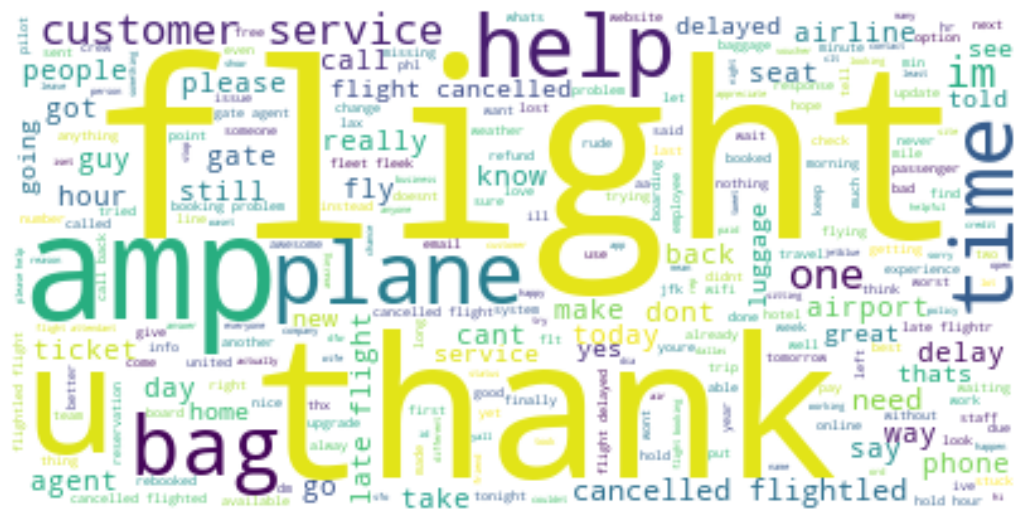

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

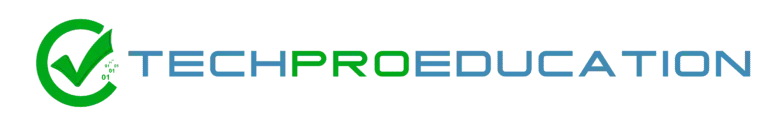